In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the dataset

In [21]:
%cd /content/drive/MyDrive/Course Material/Unsupervised Machine Learning/Hierarchical Clustering

/content/drive/MyDrive/Course Material/Unsupervised Machine Learning/Hierarchical Clustering


In [23]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
X = dataset.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Using dendrogram method to find the optimal number of clusters

In [25]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

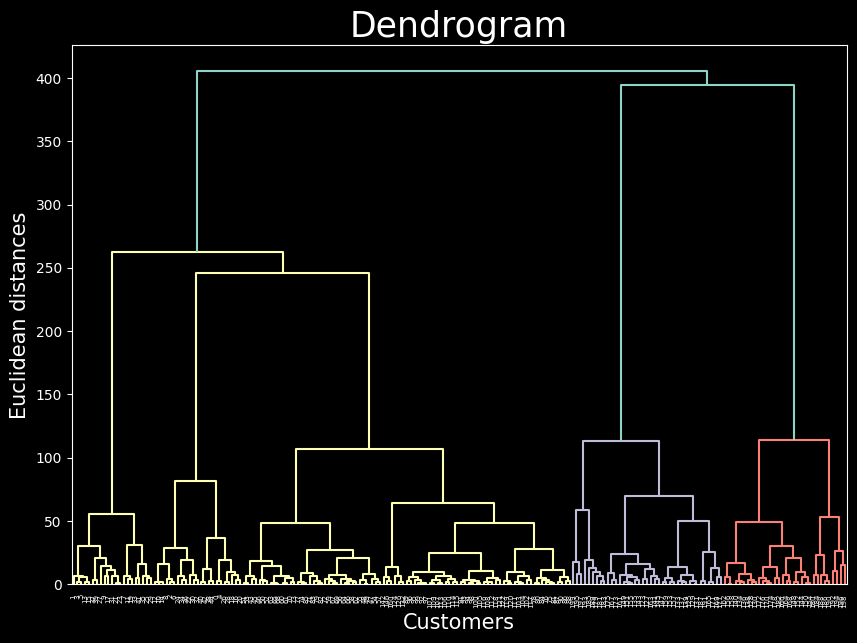

In [26]:
plt.figure(figsize = (10,7))
linkage_data = linkage(X, method='ward', metric='euclidean') # linkage calculates the distance and similarities between samples
                                                        # method "ward" minimize the variance inside the cluster.it is an optimized algo
Dendrogram = dendrogram(linkage_data)
plt.title('Dendrogram', fontsize = 25)
plt.xlabel('Customers', fontsize = 15)
plt.ylabel('Euclidean distances',fontsize = 15)
plt.show()

## Apply Hierarchical Clustering to train the model

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5)
y_pred = hc.fit_predict(X)

## Visualising the clusters

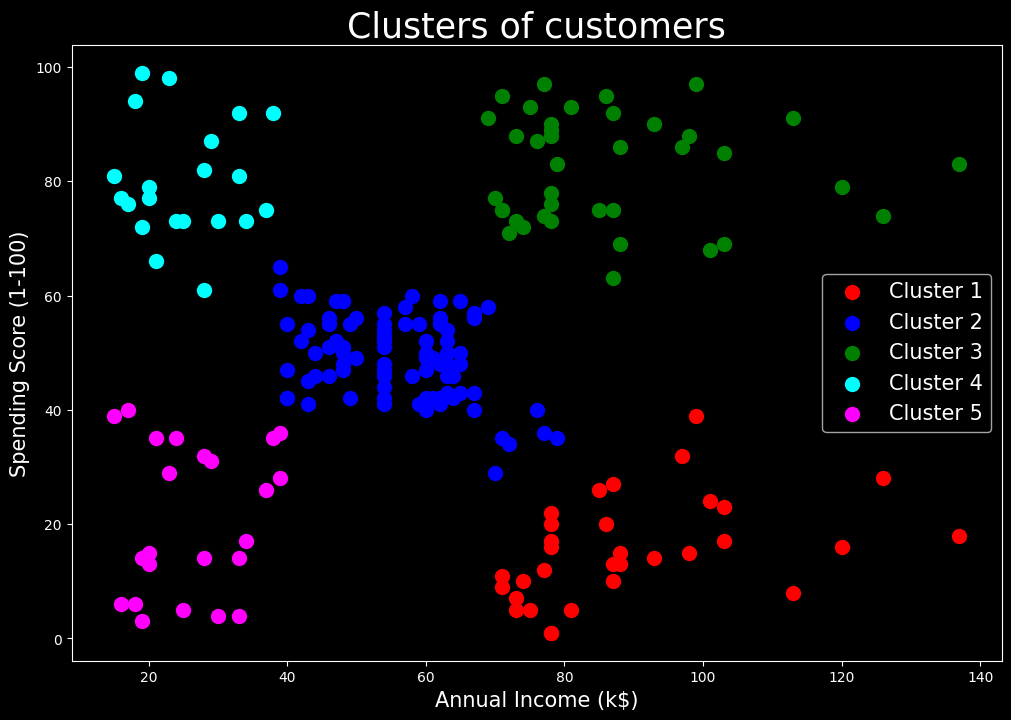

In [28]:
plt.figure(figsize = (12,8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
print(f'Silhouette Score(n = 5) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 5) : 0.5529945955148897


In [31]:
hc = AgglomerativeClustering(n_clusters = 4)
y_pred = hc.fit_predict(X)
print(f'Silhouette Score(n = 4) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 4) : 0.4916598193892782


In [32]:
hc = AgglomerativeClustering(n_clusters = 3)
y_pred = hc.fit_predict(X)
print(f'Silhouette Score(n = 3) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 3) : 0.4618340266628975
